# mor

,importance
Al2O3/SiO2,0.264174
H2O/SiO2,0.010851
NaOH/SiO2,0.051545
KOH/SiO2,0.559860
CsOH/SiO2,0.000000
temperature,0.100865
time,0.012705


トレーニングデータ


,false,mor
false,353,0
mor,0,58


テストデータ


,false,mor
false,115,3
mor,1,18


正解率(Accuracy) : 訓練 1.0, 検証 0.9708029197080292
適合率(Precision) : 訓練 1.0, 検証 0.8571428571428571
再現率(Recall) : 訓練 1.0, 検証 0.9473684210526315
F1スコア : 訓練 1.0, 検証 0.9


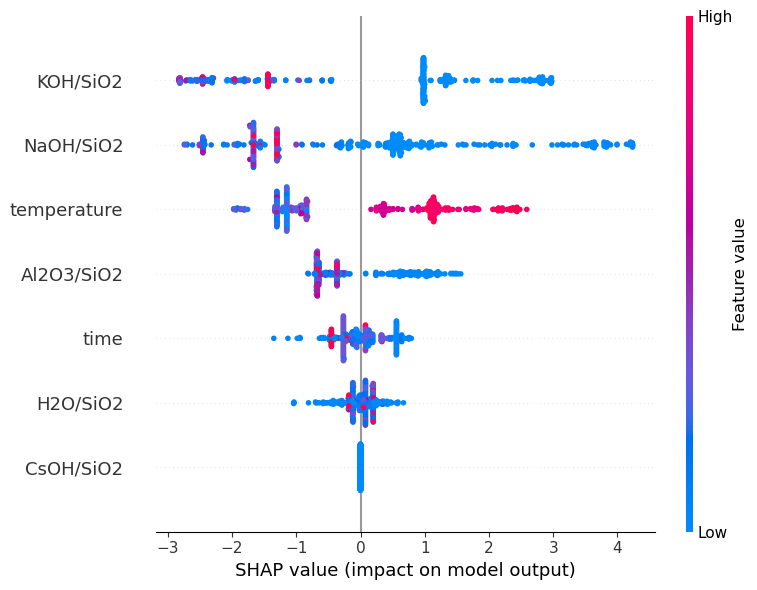

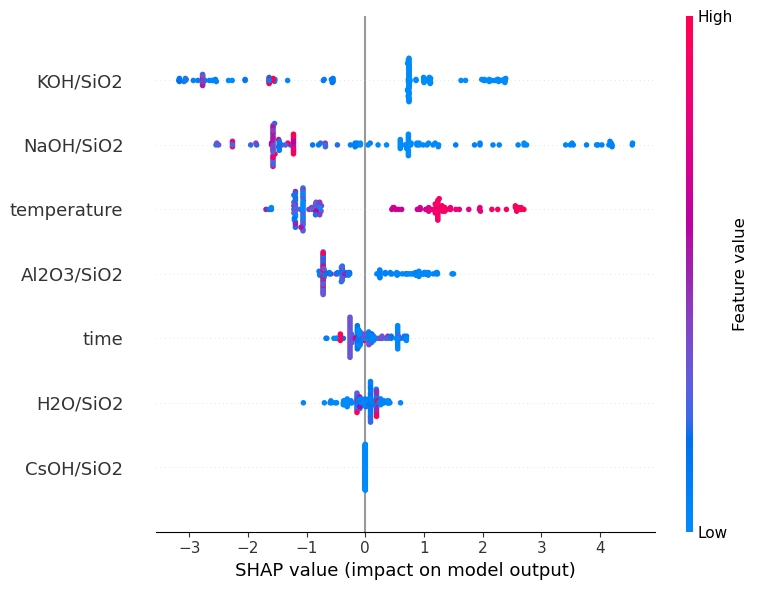

In [1]:
import pandas as pd
from IPython.display import display
dataset=pd.read_csv('zeolite_CBU_Amorphous.csv', index_col=0, header=0)
x=pd.concat([dataset.iloc[:, 0:5], dataset.iloc[:, 6:8]], axis=1)
y=dataset.iloc[:, 9]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, shuffle=True, stratify=y, random_state=3)
import xgboost as xgb
model=xgb.XGBClassifier()
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
y_train_encoded=label_encoder.fit_transform(y_train)
y_test_encoded=label_encoder.fit_transform(y_test)
model.fit(x_train, y_train_encoded)
importance=pd.DataFrame(model.feature_importances_)
importance.index=x.columns
importance.columns=['importance']
display(importance)

CBU=list(set(y))
CBU.sort()
estimated_y_train=pd.DataFrame(model.predict(x_train))
estimated_y_test=pd.DataFrame(model.predict(x_test))

from sklearn import metrics
confusion_matrix_train=pd.DataFrame(metrics.confusion_matrix(y_train_encoded, estimated_y_train), index=CBU, columns=CBU)
accuracy_train=metrics.accuracy_score(y_train_encoded, estimated_y_train)
precision_train = metrics.precision_score(y_train_encoded, estimated_y_train, pos_label=1)
recall_train = metrics.recall_score(y_train_encoded, estimated_y_train, pos_label=1)
f1_train = metrics.f1_score(y_train_encoded, estimated_y_train, pos_label=1)
print(f"トレーニングデータ")
display(confusion_matrix_train)

confusion_matrix_test=pd.DataFrame(metrics.confusion_matrix(y_test_encoded, estimated_y_test), index=CBU, columns=CBU)
accuracy_test=metrics.accuracy_score(y_test_encoded, estimated_y_test)
precision_test = metrics.precision_score(y_test_encoded, estimated_y_test, pos_label=1)
recall_test = metrics.recall_score(y_test_encoded, estimated_y_test, pos_label=1)
f1_test = metrics.f1_score(y_test_encoded, estimated_y_test, pos_label=1)
print(f"テストデータ")
display(confusion_matrix_test)

print(f"正解率(Accuracy) : 訓練 {accuracy_train}, 検証 {accuracy_test}")
print(f"適合率(Precision) : 訓練 {precision_train}, 検証 {precision_test}")
print(f"再現率(Recall) : 訓練 {recall_train}, 検証 {recall_test}")
print(f"F1スコア : 訓練 {f1_train}, 検証 {f1_test}")

import matplotlib.pyplot as plt

import shap
import pandas as pd
x_train = pd.DataFrame(x_train, columns=x.columns)
explainer = shap.Explainer(model, x_train)  
shap_values = explainer(x_train)            
shap.summary_plot(shap_values.values, x_train, plot_size=(8, 6))  
plt.show()

import shap
import pandas as pd
x_test = pd.DataFrame(x_test, columns=x.columns)
explainer = shap.Explainer(model, x_test)  
shap_values = explainer(x_test)            
shap.summary_plot(shap_values.values, x_test, plot_size=(8, 6))
plt.show()

# jbw

,importance
Al2O3/SiO2,0.091744
H2O/SiO2,0.150690
NaOH/SiO2,0.252159
KOH/SiO2,0.104563
CsOH/SiO2,0.000000
temperature,0.356967
time,0.043877


,false,jbw
false,394,0
jbw,0,17


,false,jbw
false,131,0
jbw,0,6


正解率(Accuracy) : 訓練 1.0, 検証 1.0
適合率(Precision) : 訓練 1.0, 検証 1.0
再現率(Recall) : 訓練 1.0, 検証 1.0
F1スコア : 訓練 1.0, 検証 1.0


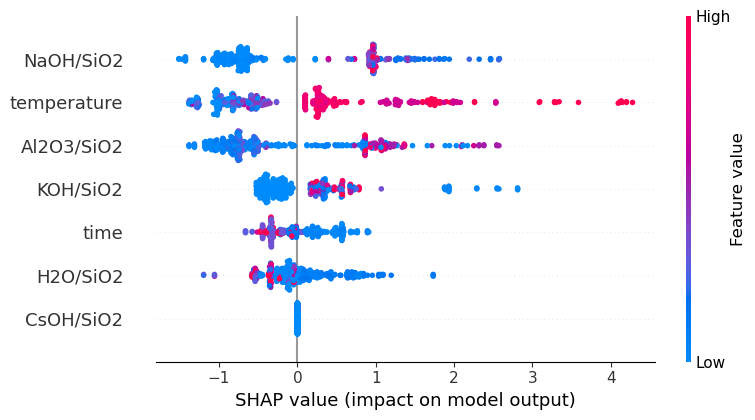

In [2]:
import pandas as pd
dataset=pd.read_csv('zeolite_CBU_Amorphous.csv', index_col=0, header=0)
x=pd.concat([dataset.iloc[:, 0:5], dataset.iloc[:, 6:8]], axis=1)
y=dataset.iloc[:, 10]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, shuffle=True, stratify=y, random_state=3)
import xgboost as xgb
model=xgb.XGBClassifier()
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
y_train_encoded=label_encoder.fit_transform(y_train)
y_test_encoded=label_encoder.fit_transform(y_test)
model.fit(x_train, y_train_encoded)
importance=pd.DataFrame(model.feature_importances_)
importance.index=x.columns
importance.columns=['importance']
display(importance)

CBU=list(set(y))
CBU.sort()
estimated_y_train=pd.DataFrame(model.predict(x_train))
estimated_y_test=pd.DataFrame(model.predict(x_test))

from sklearn import metrics
confusion_matrix_train=pd.DataFrame(metrics.confusion_matrix(y_train_encoded, estimated_y_train), index=CBU, columns=CBU)
accuracy_train=metrics.accuracy_score(y_train_encoded, estimated_y_train)
precision_train = metrics.precision_score(y_train_encoded, estimated_y_train, pos_label=1)
recall_train = metrics.recall_score(y_train_encoded, estimated_y_train, pos_label=1)
f1_train = metrics.f1_score(y_train_encoded, estimated_y_train, pos_label=1)
display(confusion_matrix_train)

confusion_matrix_test=pd.DataFrame(metrics.confusion_matrix(y_test_encoded, estimated_y_test), index=CBU, columns=CBU)
accuracy_test=metrics.accuracy_score(y_test_encoded, estimated_y_test)
precision_test = metrics.precision_score(y_test_encoded, estimated_y_test, pos_label=1)
recall_test = metrics.recall_score(y_test_encoded, estimated_y_test, pos_label=1)
f1_test = metrics.f1_score(y_test_encoded, estimated_y_test, pos_label=1)
display(confusion_matrix_test)

print(f"正解率(Accuracy) : 訓練 {accuracy_train}, 検証 {accuracy_test}")
print(f"適合率(Precision) : 訓練 {precision_train}, 検証 {precision_test}")
print(f"再現率(Recall) : 訓練 {recall_train}, 検証 {recall_test}")
print(f"F1スコア : 訓練 {f1_train}, 検証 {f1_test}")

import shap
import pandas as pd

# x_train が DataFrame でない場合は列名付きで変換
x_train = pd.DataFrame(x_train, columns=x.columns)  # ←重要！

explainer = shap.Explainer(model, x_train)  # 自動で LightGBM を判別
shap_values = explainer(x_train)            # Explanationオブジェクト

shap.summary_plot(shap_values.values, x_train)  # ← これでOK

# d6r

,importance
Al2O3/SiO2,0.070273
H2O/SiO2,0.077298
NaOH/SiO2,0.043224
KOH/SiO2,0.154515
CsOH/SiO2,0.502350
temperature,0.100278
time,0.052062


,d6r,false
d6r,135,1
false,1,274


,d6r,false
d6r,33,13
false,12,79


正解率(Accuracy) : 訓練 0.9951338199513382, 検証 0.8175182481751825
適合率(Precision) : 訓練 0.9926470588235294, 検証 0.7333333333333333
再現率(Recall) : 訓練 0.9926470588235294, 検証 0.717391304347826
F1スコア : 訓練 0.9926470588235294, 検証 0.7252747252747253


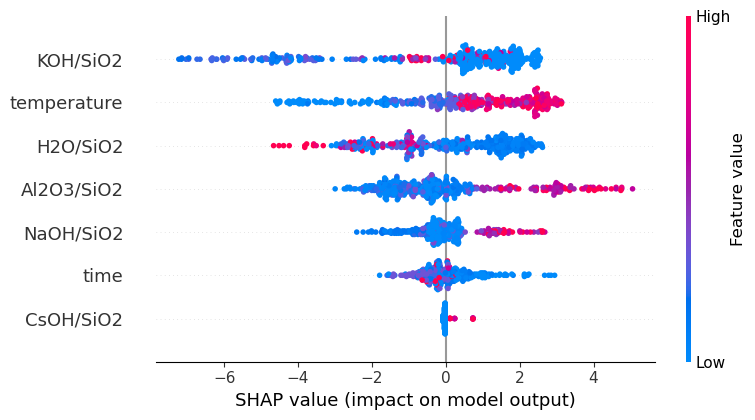

In [3]:
import pandas as pd
dataset=pd.read_csv('zeolite_CBU_Amorphous.csv', index_col=0, header=0)
x=pd.concat([dataset.iloc[:, 0:5], dataset.iloc[:, 6:8]], axis=1)
y=dataset.iloc[:, 11]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, shuffle=True, stratify=y, random_state=3)
import xgboost as xgb
model=xgb.XGBClassifier()
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
y_train_encoded=label_encoder.fit_transform(y_train)
y_test_encoded=label_encoder.fit_transform(y_test)
model.fit(x_train, y_train_encoded)
importance=pd.DataFrame(model.feature_importances_)
importance.index=x.columns
importance.columns=['importance']
display(importance)

CBU=list(set(y))
CBU.sort()
estimated_y_train=pd.DataFrame(model.predict(x_train))
estimated_y_test=pd.DataFrame(model.predict(x_test))

from sklearn import metrics
confusion_matrix_train=pd.DataFrame(metrics.confusion_matrix(y_train_encoded, estimated_y_train), index=CBU, columns=CBU)
accuracy_train=metrics.accuracy_score(y_train_encoded, estimated_y_train)
precision_train = metrics.precision_score(y_train_encoded, estimated_y_train, pos_label=0)
recall_train = metrics.recall_score(y_train_encoded, estimated_y_train, pos_label=0)
f1_train = metrics.f1_score(y_train_encoded, estimated_y_train, pos_label=0)
display(confusion_matrix_train)

confusion_matrix_test=pd.DataFrame(metrics.confusion_matrix(y_test_encoded, estimated_y_test), index=CBU, columns=CBU)
accuracy_test=metrics.accuracy_score(y_test_encoded, estimated_y_test)
precision_test = metrics.precision_score(y_test_encoded, estimated_y_test, pos_label=0)
recall_test = metrics.recall_score(y_test_encoded, estimated_y_test, pos_label=0)
f1_test = metrics.f1_score(y_test_encoded, estimated_y_test, pos_label=0)
display(confusion_matrix_test)
print(f"正解率(Accuracy) : 訓練 {accuracy_train}, 検証 {accuracy_test}")
print(f"適合率(Precision) : 訓練 {precision_train}, 検証 {precision_test}")
print(f"再現率(Recall) : 訓練 {recall_train}, 検証 {recall_test}")
print(f"F1スコア : 訓練 {f1_train}, 検証 {f1_test}")

import shap
import pandas as pd

# x_train が DataFrame でない場合は列名付きで変換
x_train = pd.DataFrame(x_train, columns=x.columns)  # ←重要！

explainer = shap.Explainer(model, x_train)  # 自動で LightGBM を判別
shap_values = explainer(x_train)            # Explanationオブジェクト

shap.summary_plot(shap_values.values, x_train)  # ← これでOK

# d8r

,importance
Al2O3/SiO2,0.051207
H2O/SiO2,0.019638
NaOH/SiO2,0.033916
KOH/SiO2,0.123136
CsOH/SiO2,0.707519
temperature,0.046358
time,0.018226


,d8r,false
d8r,45,1
false,0,365


,d8r,false
d8r,10,5
false,2,120


正解率(Accuracy) : 訓練 0.9975669099756691, 検証 0.948905109489051
適合率(Precision) : 訓練 1.0, 検証 0.8333333333333334
再現率(Recall) : 訓練 0.9782608695652174, 検証 0.6666666666666666
F1スコア : 訓練 0.989010989010989, 検証 0.7407407407407407


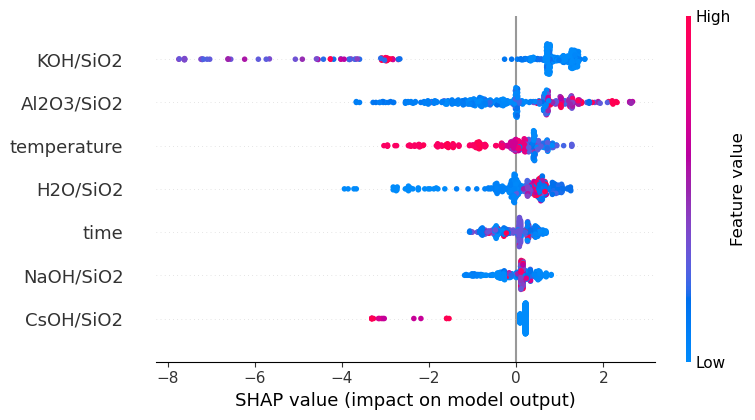

In [4]:
import pandas as pd
dataset=pd.read_csv('zeolite_CBU_Amorphous.csv', index_col=0, header=0)
x=pd.concat([dataset.iloc[:, 0:5], dataset.iloc[:, 6:8]], axis=1)
y=dataset.iloc[:, 12]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, shuffle=True, stratify=y, random_state=3)
import xgboost as xgb
model=xgb.XGBClassifier()
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
y_train_encoded=label_encoder.fit_transform(y_train)
y_test_encoded=label_encoder.fit_transform(y_test)
model.fit(x_train, y_train_encoded)
importance=pd.DataFrame(model.feature_importances_)
importance.index=x.columns
importance.columns=['importance']
display(importance)

CBU=list(set(y))
CBU.sort()
estimated_y_train=pd.DataFrame(model.predict(x_train))
estimated_y_test=pd.DataFrame(model.predict(x_test))

from sklearn import metrics
confusion_matrix_train=pd.DataFrame(metrics.confusion_matrix(y_train_encoded, estimated_y_train), index=CBU, columns=CBU)
accuracy_train=metrics.accuracy_score(y_train_encoded, estimated_y_train)
precision_train = metrics.precision_score(y_train_encoded, estimated_y_train, pos_label=0)
recall_train = metrics.recall_score(y_train_encoded, estimated_y_train, pos_label=0)
f1_train = metrics.f1_score(y_train_encoded, estimated_y_train, pos_label=0)
display(confusion_matrix_train)

confusion_matrix_test=pd.DataFrame(metrics.confusion_matrix(y_test_encoded, estimated_y_test), index=CBU, columns=CBU)
accuracy_test=metrics.accuracy_score(y_test_encoded, estimated_y_test)
precision_test = metrics.precision_score(y_test_encoded, estimated_y_test, pos_label=0)
recall_test = metrics.recall_score(y_test_encoded, estimated_y_test, pos_label=0)
f1_test = metrics.f1_score(y_test_encoded, estimated_y_test, pos_label=0)
display(confusion_matrix_test)
print(f"正解率(Accuracy) : 訓練 {accuracy_train}, 検証 {accuracy_test}")
print(f"適合率(Precision) : 訓練 {precision_train}, 検証 {precision_test}")
print(f"再現率(Recall) : 訓練 {recall_train}, 検証 {recall_test}")
print(f"F1スコア : 訓練 {f1_train}, 検証 {f1_test}")
import shap
import pandas as pd

# x_train が DataFrame でない場合は列名付きで変換
x_train = pd.DataFrame(x_train, columns=x.columns)  # ←重要！

explainer = shap.Explainer(model, x_train)  # 自動で LightGBM を判別
shap_values = explainer(x_train)            # Explanationオブジェクト

shap.summary_plot(shap_values.values, x_train)  # ← これでOK

# can

,importance
Al2O3/SiO2,0.077927
H2O/SiO2,0.074111
NaOH/SiO2,0.039310
KOH/SiO2,0.100467
CsOH/SiO2,0.511846
temperature,0.075386
time,0.120952


,can,false
can,82,1
false,0,328


,can,false
can,22,6
false,5,104


正解率(Accuracy) : 訓練 0.9975669099756691, 検証 0.9197080291970803
適合率(Precision) : 訓練 1.0, 検証 0.8148148148148148
再現率(Recall) : 訓練 0.9879518072289156, 検証 0.7857142857142857
F1スコア : 訓練 0.9939393939393939, 検証 0.8


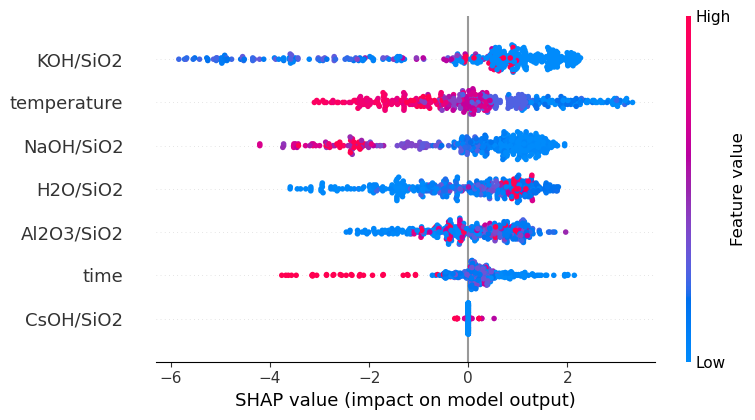

In [5]:
import pandas as pd
dataset=pd.read_csv('zeolite_CBU_Amorphous.csv', index_col=0, header=0)
x=pd.concat([dataset.iloc[:, 0:5], dataset.iloc[:, 6:8]], axis=1)
y=dataset.iloc[:, 13]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, shuffle=True, stratify=y, random_state=3)
import xgboost as xgb
model=xgb.XGBClassifier()
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
y_train_encoded=label_encoder.fit_transform(y_train)
y_test_encoded=label_encoder.fit_transform(y_test)
model.fit(x_train, y_train_encoded)
importance=pd.DataFrame(model.feature_importances_)
importance.index=x.columns
importance.columns=['importance']
display(importance)
CBU=list(set(y))
CBU.sort()
estimated_y_train=pd.DataFrame(model.predict(x_train))
estimated_y_test=pd.DataFrame(model.predict(x_test))
from sklearn import metrics
confusion_matrix_train=pd.DataFrame(metrics.confusion_matrix(y_train_encoded, estimated_y_train), index=CBU, columns=CBU)
accuracy_train=metrics.accuracy_score(y_train_encoded, estimated_y_train)
precision_train = metrics.precision_score(y_train_encoded, estimated_y_train, pos_label=0)
recall_train = metrics.recall_score(y_train_encoded, estimated_y_train, pos_label=0)
f1_train = metrics.f1_score(y_train_encoded, estimated_y_train, pos_label=0)
display(confusion_matrix_train)
confusion_matrix_test=pd.DataFrame(metrics.confusion_matrix(y_test_encoded, estimated_y_test), index=CBU, columns=CBU)
accuracy_test=metrics.accuracy_score(y_test_encoded, estimated_y_test)
precision_test = metrics.precision_score(y_test_encoded, estimated_y_test, pos_label=0)
recall_test = metrics.recall_score(y_test_encoded, estimated_y_test, pos_label=0)
f1_test = metrics.f1_score(y_test_encoded, estimated_y_test, pos_label=0)
display(confusion_matrix_test)
print(f"正解率(Accuracy) : 訓練 {accuracy_train}, 検証 {accuracy_test}")
print(f"適合率(Precision) : 訓練 {precision_train}, 検証 {precision_test}")
print(f"再現率(Recall) : 訓練 {recall_train}, 検証 {recall_test}")
print(f"F1スコア : 訓練 {f1_train}, 検証 {f1_test}")
import shap
import pandas as pd

# x_train が DataFrame でない場合は列名付きで変換
x_train = pd.DataFrame(x_train, columns=x.columns)  # ←重要！

explainer = shap.Explainer(model, x_train)  # 自動で LightGBM を判別
shap_values = explainer(x_train)            # Explanationオブジェクト

shap.summary_plot(shap_values.values, x_train)  # ← これでOK

# sod

,importance
Al2O3/SiO2,0.036083
H2O/SiO2,0.012822
NaOH/SiO2,0.183570
KOH/SiO2,0.151557
CsOH/SiO2,0.308470
temperature,0.260491
time,0.047008


,false,sod
false,298,0
sod,0,113


,false,sod
false,96,3
sod,3,35


正解率(Accuracy) : 訓練 1.0, 検証 0.9562043795620438
適合率(Precision) : 訓練 1.0, 検証 0.9210526315789473
再現率(Recall) : 訓練 1.0, 検証 0.9210526315789473
F1スコア : 訓練 1.0, 検証 0.9210526315789473


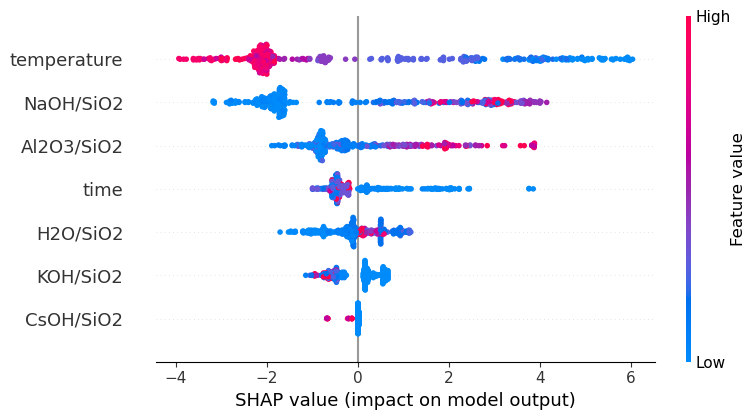

In [6]:
import pandas as pd
dataset=pd.read_csv('zeolite_CBU_Amorphous.csv', index_col=0, header=0)
x=pd.concat([dataset.iloc[:, 0:5], dataset.iloc[:, 6:8]], axis=1)
y=dataset.iloc[:, 14]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, shuffle=True, stratify=y, random_state=3)
import xgboost as xgb
model=xgb.XGBClassifier()
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
y_train_encoded=label_encoder.fit_transform(y_train)
y_test_encoded=label_encoder.fit_transform(y_test)
model.fit(x_train, y_train_encoded)
importance=pd.DataFrame(model.feature_importances_)
importance.index=x.columns
importance.columns=['importance']
display(importance)
CBU=list(set(y))
CBU.sort()
estimated_y_train=pd.DataFrame(model.predict(x_train))
estimated_y_test=pd.DataFrame(model.predict(x_test))
from sklearn import metrics
confusion_matrix_train=pd.DataFrame(metrics.confusion_matrix(y_train_encoded, estimated_y_train), index=CBU, columns=CBU)
accuracy_train=metrics.accuracy_score(y_train_encoded, estimated_y_train)
precision_train = metrics.precision_score(y_train_encoded, estimated_y_train, pos_label=1)
recall_train = metrics.recall_score(y_train_encoded, estimated_y_train, pos_label=1)
f1_train = metrics.f1_score(y_train_encoded, estimated_y_train, pos_label=1)
display(confusion_matrix_train)
confusion_matrix_test=pd.DataFrame(metrics.confusion_matrix(y_test_encoded, estimated_y_test), index=CBU, columns=CBU)
accuracy_test=metrics.accuracy_score(y_test_encoded, estimated_y_test)
precision_test = metrics.precision_score(y_test_encoded, estimated_y_test, pos_label=1)
recall_test = metrics.recall_score(y_test_encoded, estimated_y_test, pos_label=1)
f1_test = metrics.f1_score(y_test_encoded, estimated_y_test, pos_label=1)
display(confusion_matrix_test)
print(f"正解率(Accuracy) : 訓練 {accuracy_train}, 検証 {accuracy_test}")
print(f"適合率(Precision) : 訓練 {precision_train}, 検証 {precision_test}")
print(f"再現率(Recall) : 訓練 {recall_train}, 検証 {recall_test}")
print(f"F1スコア : 訓練 {f1_train}, 検証 {f1_test}")
import shap
import pandas as pd

# x_train が DataFrame でない場合は列名付きで変換
x_train = pd.DataFrame(x_train, columns=x.columns)  # ←重要！

explainer = shap.Explainer(model, x_train)  # 自動で LightGBM を判別
shap_values = explainer(x_train)            # Explanationオブジェクト

shap.summary_plot(shap_values.values, x_train)  # ← これでOK

# lta

,importance
Al2O3/SiO2,0.107250
H2O/SiO2,0.067006
NaOH/SiO2,0.043694
KOH/SiO2,0.070825
CsOH/SiO2,0.341794
temperature,0.345130
time,0.024300


,false,lta
false,351,0
lta,0,60


,false,lta
false,116,1
lta,3,17


正解率(Accuracy) : 訓練 1.0, 検証 0.9708029197080292
適合率(Precision) : 訓練 1.0, 検証 0.9444444444444444
再現率(Recall) : 訓練 1.0, 検証 0.85
F1スコア : 訓練 1.0, 検証 0.8947368421052632


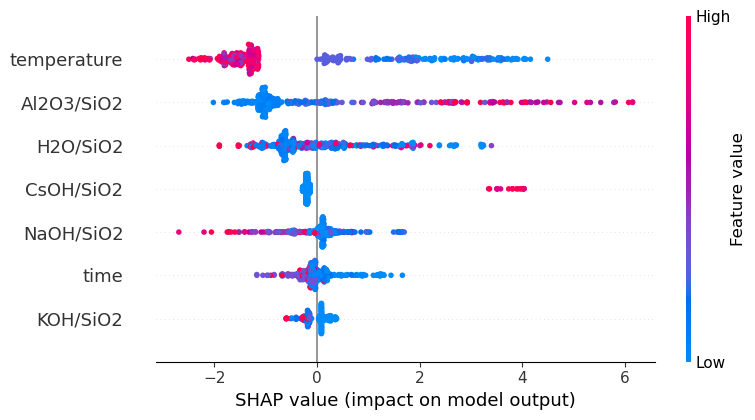

In [7]:
import pandas as pd
dataset=pd.read_csv('zeolite_CBU_Amorphous.csv', index_col=0, header=0)
x=pd.concat([dataset.iloc[:, 0:5], dataset.iloc[:, 6:8]], axis=1)
y=dataset.iloc[:, 15]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, shuffle=True, stratify=y, random_state=3)
import xgboost as xgb
model=xgb.XGBClassifier()
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
y_train_encoded=label_encoder.fit_transform(y_train)
y_test_encoded=label_encoder.fit_transform(y_test)
model.fit(x_train, y_train_encoded)
importance=pd.DataFrame(model.feature_importances_)
importance.index=x.columns
importance.columns=['importance']
display(importance)
CBU=list(set(y))
CBU.sort()
estimated_y_train=pd.DataFrame(model.predict(x_train))
estimated_y_test=pd.DataFrame(model.predict(x_test))
from sklearn import metrics
confusion_matrix_train=pd.DataFrame(metrics.confusion_matrix(y_train_encoded, estimated_y_train), index=CBU, columns=CBU)
accuracy_train=metrics.accuracy_score(y_train_encoded, estimated_y_train)
precision_train = metrics.precision_score(y_train_encoded, estimated_y_train, pos_label=1)
recall_train = metrics.recall_score(y_train_encoded, estimated_y_train, pos_label=1)
f1_train = metrics.f1_score(y_train_encoded, estimated_y_train, pos_label=1)
display(confusion_matrix_train)
confusion_matrix_test=pd.DataFrame(metrics.confusion_matrix(y_test_encoded, estimated_y_test), index=CBU, columns=CBU)
accuracy_test=metrics.accuracy_score(y_test_encoded, estimated_y_test)
precision_test = metrics.precision_score(y_test_encoded, estimated_y_test, pos_label=1)
recall_test = metrics.recall_score(y_test_encoded, estimated_y_test, pos_label=1)
f1_test = metrics.f1_score(y_test_encoded, estimated_y_test, pos_label=1)
display(confusion_matrix_test)
print(f"正解率(Accuracy) : 訓練 {accuracy_train}, 検証 {accuracy_test}")
print(f"適合率(Precision) : 訓練 {precision_train}, 検証 {precision_test}")
print(f"再現率(Recall) : 訓練 {recall_train}, 検証 {recall_test}")
print(f"F1スコア : 訓練 {f1_train}, 検証 {f1_test}")
import shap
import pandas as pd

# x_train が DataFrame でない場合は列名付きで変換
x_train = pd.DataFrame(x_train, columns=x.columns)  # ←重要！

explainer = shap.Explainer(model, x_train)  # 自動で LightGBM を判別
shap_values = explainer(x_train)            # Explanationオブジェクト

shap.summary_plot(shap_values.values, x_train)  # ← これでOK

# 4

,importance
Al2O3/SiO2,0.111466
H2O/SiO2,0.075170
NaOH/SiO2,0.255441
KOH/SiO2,0.194185
CsOH/SiO2,0.000000
temperature,0.205853
time,0.157885


,4,false
4,234,2
false,1,174


,4,false
4,75,4
false,5,53


正解率(Accuracy) : 訓練 0.9927007299270073, 検証 0.9343065693430657
適合率(Precision) : 訓練 0.9957446808510638, 検証 0.9375
再現率(Recall) : 訓練 0.9915254237288136, 検証 0.9493670886075949
F1スコア : 訓練 0.9936305732484076, 検証 0.9433962264150944


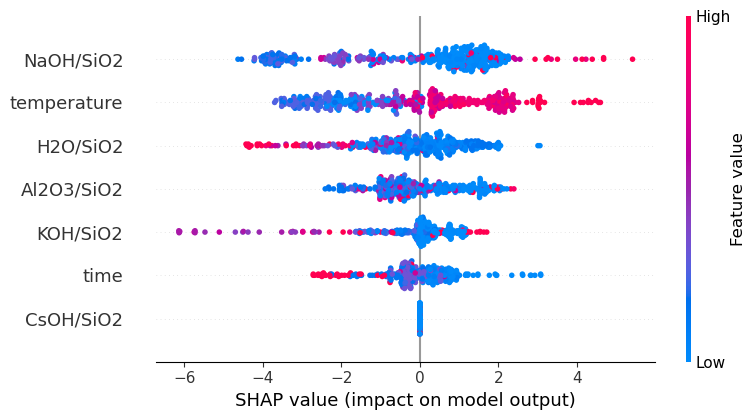

In [8]:
import pandas as pd
dataset=pd.read_csv('zeolite_CBU_Amorphous.csv', index_col=0, header=0)
x=pd.concat([dataset.iloc[:, 0:5], dataset.iloc[:, 6:8]], axis=1)
y=dataset.iloc[:, 16]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, shuffle=True, stratify=y, random_state=3)
import xgboost as xgb
model=xgb.XGBClassifier()
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
y_train_encoded=label_encoder.fit_transform(y_train)
y_test_encoded=label_encoder.fit_transform(y_test)
model.fit(x_train, y_train_encoded)
importance=pd.DataFrame(model.feature_importances_)
importance.index=x.columns
importance.columns=['importance']
display(importance)
CBU=list(set(y))
CBU.sort()
estimated_y_train=pd.DataFrame(model.predict(x_train))
estimated_y_test=pd.DataFrame(model.predict(x_test))
from sklearn import metrics
confusion_matrix_train=pd.DataFrame(metrics.confusion_matrix(y_train_encoded, estimated_y_train), index=CBU, columns=CBU)
accuracy_train=metrics.accuracy_score(y_train_encoded, estimated_y_train)
precision_train = metrics.precision_score(y_train_encoded, estimated_y_train, pos_label=0)
recall_train = metrics.recall_score(y_train_encoded, estimated_y_train, pos_label=0)
f1_train = metrics.f1_score(y_train_encoded, estimated_y_train, pos_label=0)
display(confusion_matrix_train)
confusion_matrix_test=pd.DataFrame(metrics.confusion_matrix(y_test_encoded, estimated_y_test), index=CBU, columns=CBU)
accuracy_test=metrics.accuracy_score(y_test_encoded, estimated_y_test)
precision_test = metrics.precision_score(y_test_encoded, estimated_y_test, pos_label=0)
recall_test = metrics.recall_score(y_test_encoded, estimated_y_test, pos_label=0)
f1_test = metrics.f1_score(y_test_encoded, estimated_y_test, pos_label=0)
display(confusion_matrix_test)
print(f"正解率(Accuracy) : 訓練 {accuracy_train}, 検証 {accuracy_test}")
print(f"適合率(Precision) : 訓練 {precision_train}, 検証 {precision_test}")
print(f"再現率(Recall) : 訓練 {recall_train}, 検証 {recall_test}")
print(f"F1スコア : 訓練 {f1_train}, 検証 {f1_test}")
import shap
import pandas as pd

# x_train が DataFrame でない場合は列名付きで変換
x_train = pd.DataFrame(x_train, columns=x.columns)  # ←重要！

explainer = shap.Explainer(model, x_train)  # 自動で LightGBM を判別
shap_values = explainer(x_train)            # Explanationオブジェクト

shap.summary_plot(shap_values.values, x_train)  # ← これでOK

# 6

,importance
Al2O3/SiO2,0.096255
H2O/SiO2,0.101508
NaOH/SiO2,0.283922
KOH/SiO2,0.263394
CsOH/SiO2,0.000000
temperature,0.158371
time,0.096549


,6,false
6,229,1
false,0,181


,6,false
6,69,7
false,12,49


正解率(Accuracy) : 訓練 0.9975669099756691, 検証 0.8613138686131386
適合率(Precision) : 訓練 1.0, 検証 0.8518518518518519
再現率(Recall) : 訓練 0.9956521739130435, 検証 0.9078947368421053
F1スコア : 訓練 0.9978213507625272, 検証 0.8789808917197452


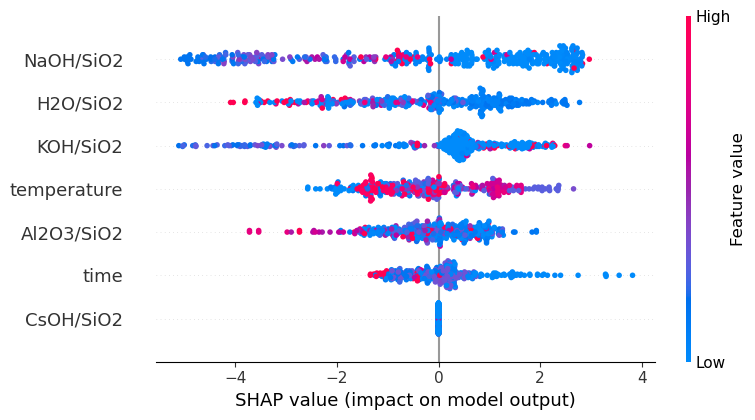

In [9]:
import pandas as pd
dataset=pd.read_csv('zeolite_CBU_Amorphous.csv', index_col=0, header=0)
x=pd.concat([dataset.iloc[:, 0:5], dataset.iloc[:, 6:8]], axis=1)
y=dataset.iloc[:, 17]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, shuffle=True, stratify=y, random_state=3)
import xgboost as xgb
model=xgb.XGBClassifier()
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
y_train_encoded=label_encoder.fit_transform(y_train)
y_test_encoded=label_encoder.fit_transform(y_test)
model.fit(x_train, y_train_encoded)
importance=pd.DataFrame(model.feature_importances_)
importance.index=x.columns
importance.columns=['importance']
display(importance)
CBU=list(set(y))
CBU.sort()
estimated_y_train=pd.DataFrame(model.predict(x_train))
estimated_y_test=pd.DataFrame(model.predict(x_test))
from sklearn import metrics
confusion_matrix_train=pd.DataFrame(metrics.confusion_matrix(y_train_encoded, estimated_y_train), index=CBU, columns=CBU)
accuracy_train=metrics.accuracy_score(y_train_encoded, estimated_y_train)
precision_train = metrics.precision_score(y_train_encoded, estimated_y_train, pos_label=0)
recall_train = metrics.recall_score(y_train_encoded, estimated_y_train, pos_label=0)
f1_train = metrics.f1_score(y_train_encoded, estimated_y_train, pos_label=0)
display(confusion_matrix_train)
confusion_matrix_test=pd.DataFrame(metrics.confusion_matrix(y_test_encoded, estimated_y_test), index=CBU, columns=CBU)
accuracy_test=metrics.accuracy_score(y_test_encoded, estimated_y_test)
precision_test = metrics.precision_score(y_test_encoded, estimated_y_test, pos_label=0)
recall_test = metrics.recall_score(y_test_encoded, estimated_y_test, pos_label=0)
f1_test = metrics.f1_score(y_test_encoded, estimated_y_test, pos_label=0)
display(confusion_matrix_test)
print(f"正解率(Accuracy) : 訓練 {accuracy_train}, 検証 {accuracy_test}")
print(f"適合率(Precision) : 訓練 {precision_train}, 検証 {precision_test}")
print(f"再現率(Recall) : 訓練 {recall_train}, 検証 {recall_test}")
print(f"F1スコア : 訓練 {f1_train}, 検証 {f1_test}")
import shap
import pandas as pd

# x_train が DataFrame でない場合は列名付きで変換
x_train = pd.DataFrame(x_train, columns=x.columns)  # ←重要！

explainer = shap.Explainer(model, x_train)  # 自動で LightGBM を判別
shap_values = explainer(x_train)            # Explanationオブジェクト

shap.summary_plot(shap_values.values, x_train)  # ← これでOK

# 8

,importance
Al2O3/SiO2,0.176529
H2O/SiO2,0.073544
NaOH/SiO2,0.083470
KOH/SiO2,0.258228
CsOH/SiO2,0.183099
temperature,0.132428
time,0.092701


,8,false
8,131,0
false,0,280


,8,false
8,35,9
false,12,81


正解率(Accuracy) : 訓練 1.0, 検証 0.8467153284671532
適合率(Precision) : 訓練 1.0, 検証 0.7446808510638298
再現率(Recall) : 訓練 1.0, 検証 0.7954545454545454
F1スコア : 訓練 1.0, 検証 0.7692307692307693


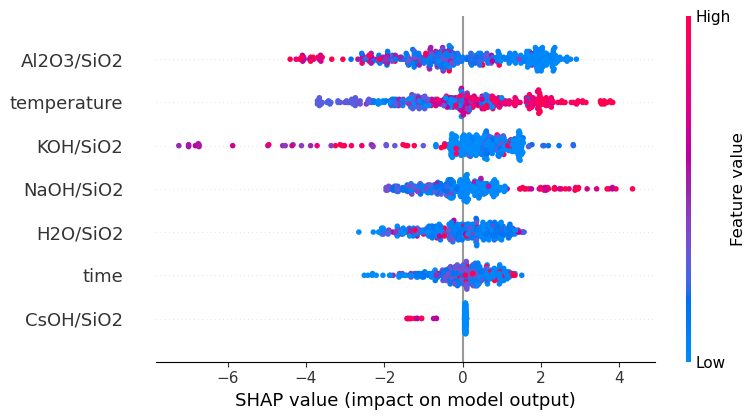

In [10]:
import pandas as pd
dataset=pd.read_csv('zeolite_CBU_Amorphous.csv', index_col=0, header=0)
x=pd.concat([dataset.iloc[:, 0:5], dataset.iloc[:, 6:8]], axis=1)
y=dataset.iloc[:, 18]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, shuffle=True, stratify=y, random_state=3)
import xgboost as xgb
model=xgb.XGBClassifier()
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
y_train_encoded=label_encoder.fit_transform(y_train)
y_test_encoded=label_encoder.fit_transform(y_test)
model.fit(x_train, y_train_encoded)
importance=pd.DataFrame(model.feature_importances_)
importance.index=x.columns
importance.columns=['importance']
display(importance)
CBU=list(set(y))
CBU.sort()
estimated_y_train=pd.DataFrame(model.predict(x_train))
estimated_y_test=pd.DataFrame(model.predict(x_test))
from sklearn import metrics
confusion_matrix_train=pd.DataFrame(metrics.confusion_matrix(y_train_encoded, estimated_y_train), index=CBU, columns=CBU)
accuracy_train=metrics.accuracy_score(y_train_encoded, estimated_y_train)
precision_train = metrics.precision_score(y_train_encoded, estimated_y_train, pos_label=0)
recall_train = metrics.recall_score(y_train_encoded, estimated_y_train, pos_label=0)
f1_train = metrics.f1_score(y_train_encoded, estimated_y_train, pos_label=0)
display(confusion_matrix_train)
confusion_matrix_test=pd.DataFrame(metrics.confusion_matrix(y_test_encoded, estimated_y_test), index=CBU, columns=CBU)
accuracy_test=metrics.accuracy_score(y_test_encoded, estimated_y_test)
precision_test = metrics.precision_score(y_test_encoded, estimated_y_test, pos_label=0)
recall_test = metrics.recall_score(y_test_encoded, estimated_y_test, pos_label=0)
f1_test = metrics.f1_score(y_test_encoded, estimated_y_test, pos_label=0)
display(confusion_matrix_test)
print(f"正解率(Accuracy) : 訓練 {accuracy_train}, 検証 {accuracy_test}")
print(f"適合率(Precision) : 訓練 {precision_train}, 検証 {precision_test}")
print(f"再現率(Recall) : 訓練 {recall_train}, 検証 {recall_test}")
print(f"F1スコア : 訓練 {f1_train}, 検証 {f1_test}")
import shap
import pandas as pd

# x_train が DataFrame でない場合は列名付きで変換
x_train = pd.DataFrame(x_train, columns=x.columns)  # ←重要！

explainer = shap.Explainer(model, x_train)  # 自動で LightGBM を判別
shap_values = explainer(x_train)            # Explanationオブジェクト

shap.summary_plot(shap_values.values, x_train)  # ← これでOK

# 5-1

,importance
Al2O3/SiO2,0.212615
H2O/SiO2,0.032391
NaOH/SiO2,0.122758
KOH/SiO2,0.436431
CsOH/SiO2,0.000000
temperature,0.170019
time,0.025787


,5-1,false
5-1,63,0
false,0,348


,5-1,false
5-1,21,0
false,0,116


正解率(Accuracy) : 訓練 1.0, 検証 1.0
適合率(Precision) : 訓練 1.0, 検証 1.0
再現率(Recall) : 訓練 1.0, 検証 1.0
F1スコア : 訓練 1.0, 検証 1.0


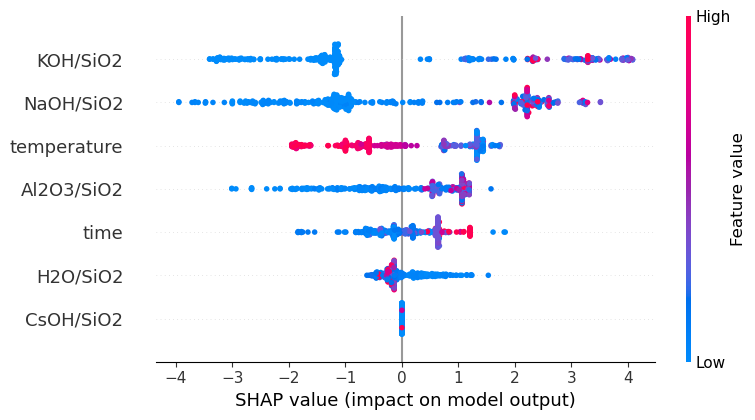

In [11]:
import pandas as pd
dataset=pd.read_csv('zeolite_CBU_Amorphous.csv', index_col=0, header=0)
x=pd.concat([dataset.iloc[:, 0:5], dataset.iloc[:, 6:8]], axis=1)
y=dataset.iloc[:, 19]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, shuffle=True, stratify=y, random_state=3)
import xgboost as xgb
model=xgb.XGBClassifier()
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
y_train_encoded=label_encoder.fit_transform(y_train)
y_test_encoded=label_encoder.fit_transform(y_test)
model.fit(x_train, y_train_encoded)
importance=pd.DataFrame(model.feature_importances_)
importance.index=x.columns
importance.columns=['importance']
display(importance)
CBU=list(set(y))
CBU.sort()
estimated_y_train=pd.DataFrame(model.predict(x_train))
estimated_y_test=pd.DataFrame(model.predict(x_test))
from sklearn import metrics
confusion_matrix_train=pd.DataFrame(metrics.confusion_matrix(y_train_encoded, estimated_y_train), index=CBU, columns=CBU)
accuracy_train=metrics.accuracy_score(y_train_encoded, estimated_y_train)
precision_train = metrics.precision_score(y_train_encoded, estimated_y_train, pos_label=0)
recall_train = metrics.recall_score(y_train_encoded, estimated_y_train, pos_label=0)
f1_train = metrics.f1_score(y_train_encoded, estimated_y_train, pos_label=0)
display(confusion_matrix_train)
confusion_matrix_test=pd.DataFrame(metrics.confusion_matrix(y_test_encoded, estimated_y_test), index=CBU, columns=CBU)
accuracy_test=metrics.accuracy_score(y_test_encoded, estimated_y_test)
precision_test = metrics.precision_score(y_test_encoded, estimated_y_test, pos_label=0)
recall_test = metrics.recall_score(y_test_encoded, estimated_y_test, pos_label=0)
f1_test = metrics.f1_score(y_test_encoded, estimated_y_test, pos_label=0)
display(confusion_matrix_test)
print(f"正解率(Accuracy) : 訓練 {accuracy_train}, 検証 {accuracy_test}")
print(f"適合率(Precision) : 訓練 {precision_train}, 検証 {precision_test}")
print(f"再現率(Recall) : 訓練 {recall_train}, 検証 {recall_test}")
print(f"F1スコア : 訓練 {f1_train}, 検証 {f1_test}")
import shap
import pandas as pd

# x_train が DataFrame でない場合は列名付きで変換
x_train = pd.DataFrame(x_train, columns=x.columns)  # ←重要！

explainer = shap.Explainer(model, x_train)  # 自動で LightGBM を判別
shap_values = explainer(x_train)            # Explanationオブジェクト

shap.summary_plot(shap_values.values, x_train)  # ← これでOK

# 4-2

,importance
Al2O3/SiO2,0.070273
H2O/SiO2,0.077298
NaOH/SiO2,0.043224
KOH/SiO2,0.154515
CsOH/SiO2,0.502350
temperature,0.100278
time,0.052062


,4-2,false
4-2,135,1
false,1,274


,4-2,false
4-2,33,13
false,12,79


正解率(Accuracy) : 訓練 0.9951338199513382, 検証 0.8175182481751825
適合率(Precision) : 訓練 0.9926470588235294, 検証 0.7333333333333333
再現率(Recall) : 訓練 0.9926470588235294, 検証 0.717391304347826
F1スコア : 訓練 0.9926470588235294, 検証 0.7252747252747253


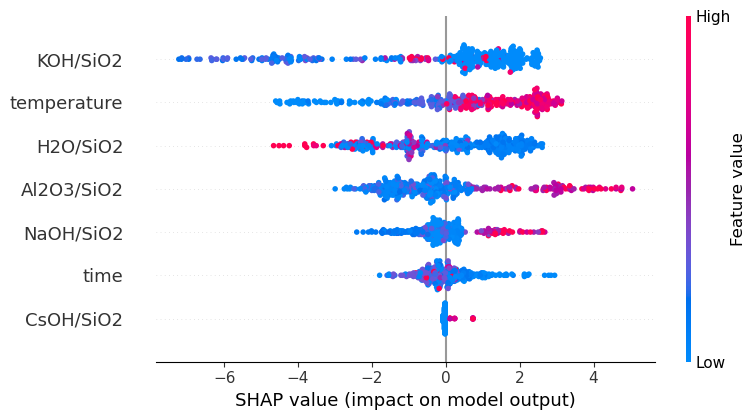

In [12]:
import pandas as pd
dataset=pd.read_csv('zeolite_CBU_Amorphous.csv', index_col=0, header=0)
x=pd.concat([dataset.iloc[:, 0:5], dataset.iloc[:, 6:8]], axis=1)
y=dataset.iloc[:, 20]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, shuffle=True, stratify=y, random_state=3)
import xgboost as xgb
model=xgb.XGBClassifier()
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
y_train_encoded=label_encoder.fit_transform(y_train)
y_test_encoded=label_encoder.fit_transform(y_test)
model.fit(x_train, y_train_encoded)
importance=pd.DataFrame(model.feature_importances_)
importance.index=x.columns
importance.columns=['importance']
display(importance)
CBU=list(set(y))
CBU.sort()
estimated_y_train=pd.DataFrame(model.predict(x_train))
estimated_y_test=pd.DataFrame(model.predict(x_test))
from sklearn import metrics
confusion_matrix_train=pd.DataFrame(metrics.confusion_matrix(y_train_encoded, estimated_y_train), index=CBU, columns=CBU)
accuracy_train=metrics.accuracy_score(y_train_encoded, estimated_y_train)
precision_train = metrics.precision_score(y_train_encoded, estimated_y_train, pos_label=0)
recall_train = metrics.recall_score(y_train_encoded, estimated_y_train, pos_label=0)
f1_train = metrics.f1_score(y_train_encoded, estimated_y_train, pos_label=0)
display(confusion_matrix_train)
confusion_matrix_test=pd.DataFrame(metrics.confusion_matrix(y_test_encoded, estimated_y_test), index=CBU, columns=CBU)
accuracy_test=metrics.accuracy_score(y_test_encoded, estimated_y_test)
precision_test = metrics.precision_score(y_test_encoded, estimated_y_test, pos_label=0)
recall_test = metrics.recall_score(y_test_encoded, estimated_y_test, pos_label=0)
f1_test = metrics.f1_score(y_test_encoded, estimated_y_test, pos_label=0)
display(confusion_matrix_test)
print(f"正解率(Accuracy) : 訓練 {accuracy_train}, 検証 {accuracy_test}")
print(f"適合率(Precision) : 訓練 {precision_train}, 検証 {precision_test}")
print(f"再現率(Recall) : 訓練 {recall_train}, 検証 {recall_test}")
print(f"F1スコア : 訓練 {f1_train}, 検証 {f1_test}")
import shap
import pandas as pd

# x_train が DataFrame でない場合は列名付きで変換
x_train = pd.DataFrame(x_train, columns=x.columns)  # ←重要！

explainer = shap.Explainer(model, x_train)  # 自動で LightGBM を判別
shap_values = explainer(x_train)            # Explanationオブジェクト

shap.summary_plot(shap_values.values, x_train)  # ← これでOK

# 6-2

,importance
Al2O3/SiO2,0.133418
H2O/SiO2,0.063655
NaOH/SiO2,0.166760
KOH/SiO2,0.362313
CsOH/SiO2,0.089211
temperature,0.100347
time,0.084296


,6-2,false
6-2,115,0
false,0,296


,6-2,false
6-2,29,10
false,9,89


正解率(Accuracy) : 訓練 1.0, 検証 0.8613138686131386
適合率(Precision) : 訓練 1.0, 検証 0.7631578947368421
再現率(Recall) : 訓練 1.0, 検証 0.7435897435897436
F1スコア : 訓練 1.0, 検証 0.7532467532467533


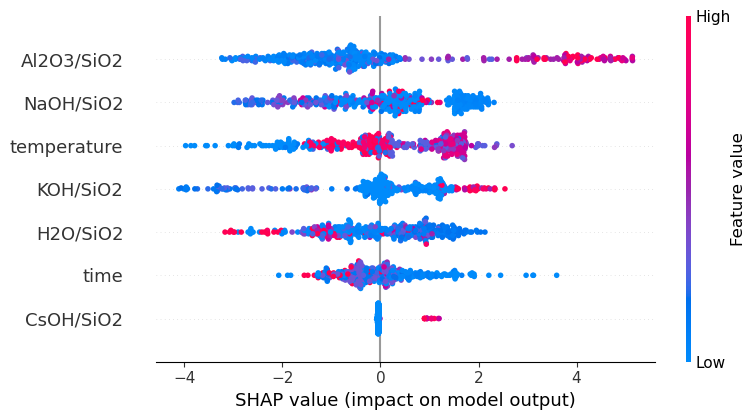

In [13]:
import pandas as pd
dataset=pd.read_csv('zeolite_CBU_Amorphous.csv', index_col=0, header=0)
x=pd.concat([dataset.iloc[:, 0:5], dataset.iloc[:, 6:8]], axis=1)
y=dataset.iloc[:, 21]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, shuffle=True, stratify=y, random_state=3)
import xgboost as xgb
model=xgb.XGBClassifier()
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
y_train_encoded=label_encoder.fit_transform(y_train)
y_test_encoded=label_encoder.fit_transform(y_test)
model.fit(x_train, y_train_encoded)
importance=pd.DataFrame(model.feature_importances_)
importance.index=x.columns
importance.columns=['importance']
display(importance)
CBU=list(set(y))
CBU.sort()
estimated_y_train=pd.DataFrame(model.predict(x_train))
estimated_y_test=pd.DataFrame(model.predict(x_test))
from sklearn import metrics
confusion_matrix_train=pd.DataFrame(metrics.confusion_matrix(y_train_encoded, estimated_y_train), index=CBU, columns=CBU)
accuracy_train=metrics.accuracy_score(y_train_encoded, estimated_y_train)
precision_train = metrics.precision_score(y_train_encoded, estimated_y_train, pos_label=0)
recall_train = metrics.recall_score(y_train_encoded, estimated_y_train, pos_label=0)
f1_train = metrics.f1_score(y_train_encoded, estimated_y_train, pos_label=0)
display(confusion_matrix_train)
confusion_matrix_test=pd.DataFrame(metrics.confusion_matrix(y_test_encoded, estimated_y_test), index=CBU, columns=CBU)
accuracy_test=metrics.accuracy_score(y_test_encoded, estimated_y_test)
precision_test = metrics.precision_score(y_test_encoded, estimated_y_test, pos_label=0)
recall_test = metrics.recall_score(y_test_encoded, estimated_y_test, pos_label=0)
f1_test = metrics.f1_score(y_test_encoded, estimated_y_test, pos_label=0)
display(confusion_matrix_test)
print(f"正解率(Accuracy) : 訓練 {accuracy_train}, 検証 {accuracy_test}")
print(f"適合率(Precision) : 訓練 {precision_train}, 検証 {precision_test}")
print(f"再現率(Recall) : 訓練 {recall_train}, 検証 {recall_test}")
print(f"F1スコア : 訓練 {f1_train}, 検証 {f1_test}")
import shap
import pandas as pd

# x_train が DataFrame でない場合は列名付きで変換
x_train = pd.DataFrame(x_train, columns=x.columns)  # ←重要！

explainer = shap.Explainer(model, x_train)  # 自動で LightGBM を判別
shap_values = explainer(x_train)            # Explanationオブジェクト

shap.summary_plot(shap_values.values, x_train)  # ← これでOK